In [4]:
 %matplotlib inline
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV


from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [6]:
data = pd.read_csv('./KB_mxxg/comb_pre_to_cat2.csv')

In [7]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], 1)

In [8]:
data.columns.values

array(['price', 'd_yr', 'd_mon', 'area', 'floor', 'no_unit', 'no_bldg',
       'max_fl', 'min_fl', 'no_p', 'no_pph', 'conv', 'medi', 'park',
       'road', 'pre_sch', 'ele_sch', 'mid_sch', 'high_sch', 'uni', 'etc',
       'S-1', 'S-2', 'S-3', 'S-4', 'S-5', 'S-6', 'S-7', 'S-8', 'S-9',
       'S-BD', 'S-NBD', 'S-GC', 'S-JA', 'S-Air', 'dis', 'cont_rank',
       'lat', 'long', 'room_id', 'sup_area', 'no_type', 'no_room', 'bath',
       'com_year', 'com_mon', 'h_cor', 'h_str', 'h_mix', 'ht_ind',
       'ht_cen', 'ht_dis', 'f_gas', 'f_co', '51', '60', '69', '25', '22',
       '37', '8', '23', '3', '6', '16', '17', '10', '7', '11', '4', '12',
       '2', '1', '5', '9', '13', '14', '19', '18', '20', '15', '26', '21',
       '43', '45', '53', '24', '11110', '11140', '11170', '11200',
       '11215', '11230', '11260', '11290', '11305', '11320', '11350',
       '11380', '11410', '11440', '11470', '11500', '11530', '11545',
       '11560', '11590', '11620', '11650', '11680', '11710', '11740',
    

In [9]:
dong_remove_df = data.drop(['51', '60', '69', '25', '22',
       '37', '8', '23', '3', '6', '16', '17', '10', '7', '11', '4', '12',
       '2', '1', '5', '9', '13', '14', '19', '18', '20', '15', '26', '21',
       '43', '45', '53', '24'], 1)

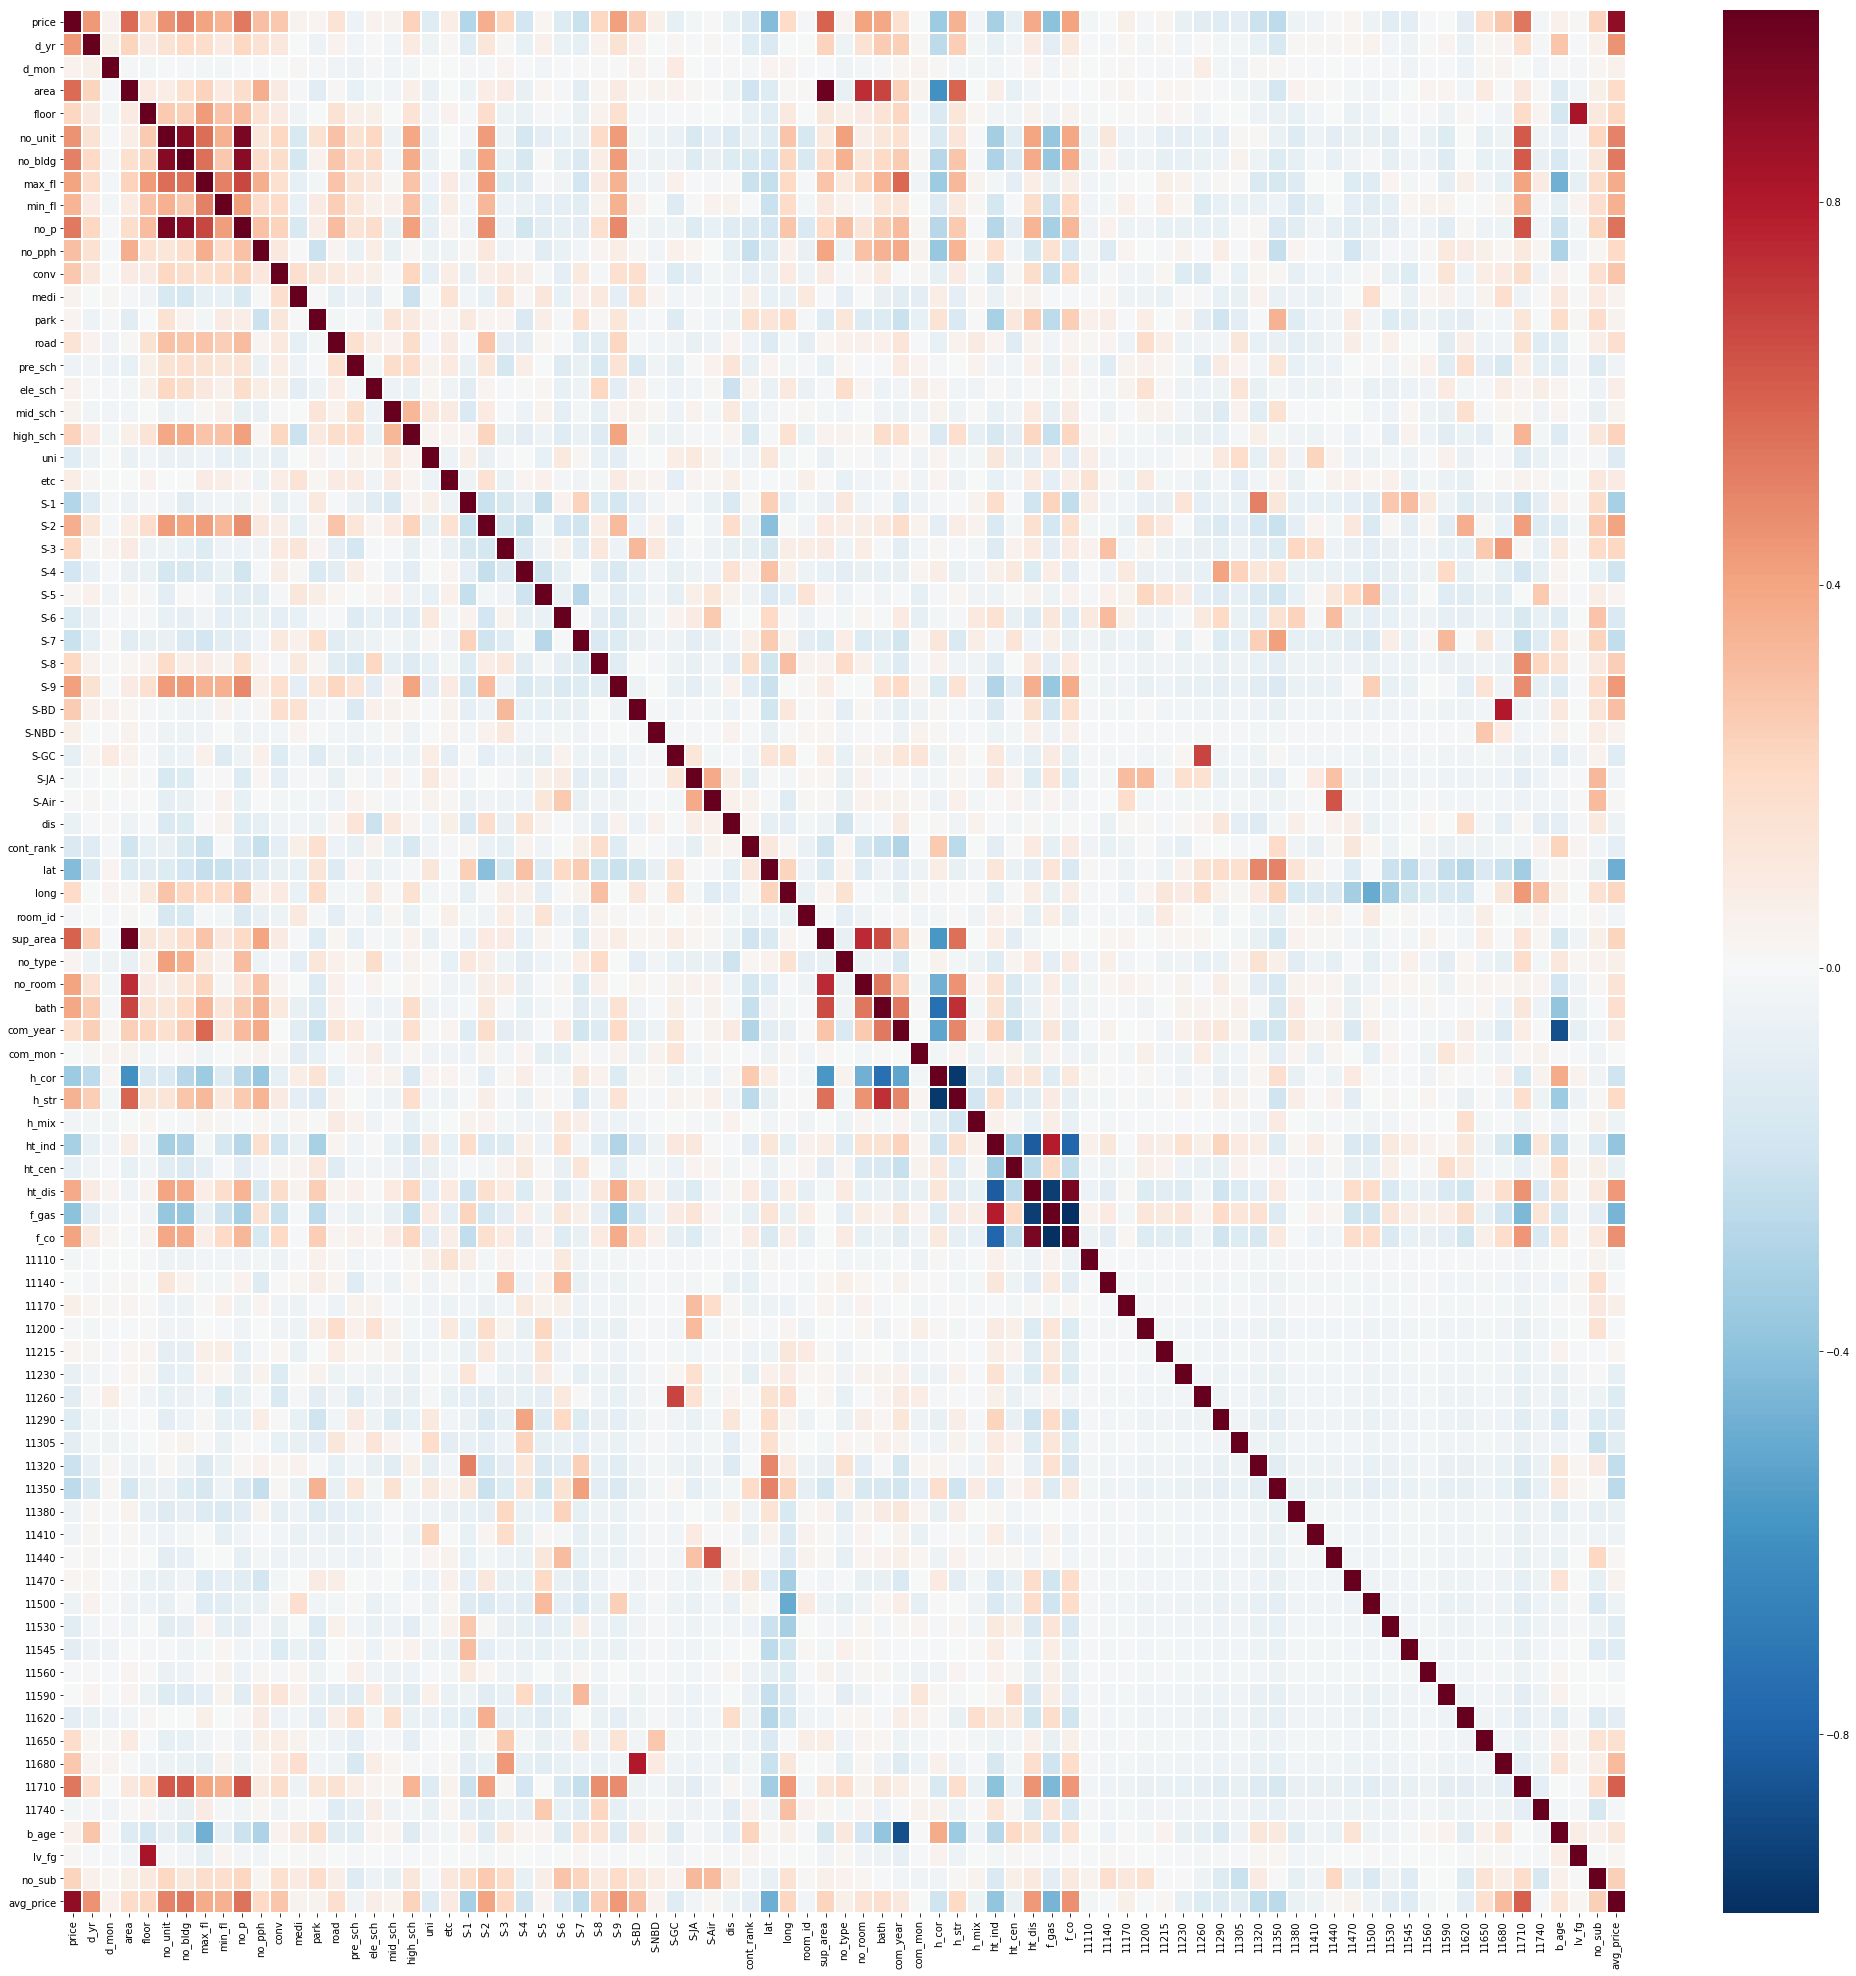

In [10]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=dong_remove_df.corr(method='pearson'), annot=False, fmt='.2f', linewidths='1', cmap='RdBu_r')

In [11]:
tmp = dong_remove_df.corr(method='pearson')

In [12]:
tmp = tmp.loc[:][:1]
tmp

,price,d_yr,d_mon,area,floor,no_unit,no_bldg,max_fl,min_fl,no_p,...,11590,11620,11650,11680,11710,11740,b_age,lv_fg,no_sub,avg_price
price,1.0,0.434609,0.045922,0.572475,0.218196,0.456801,0.503434,0.409379,0.347734,0.531401,...,0.00197,-0.100024,0.188001,0.270739,0.540215,-0.017212,0.059125,0.014611,0.228941,0.885328


In [13]:
tmp = tmp.T

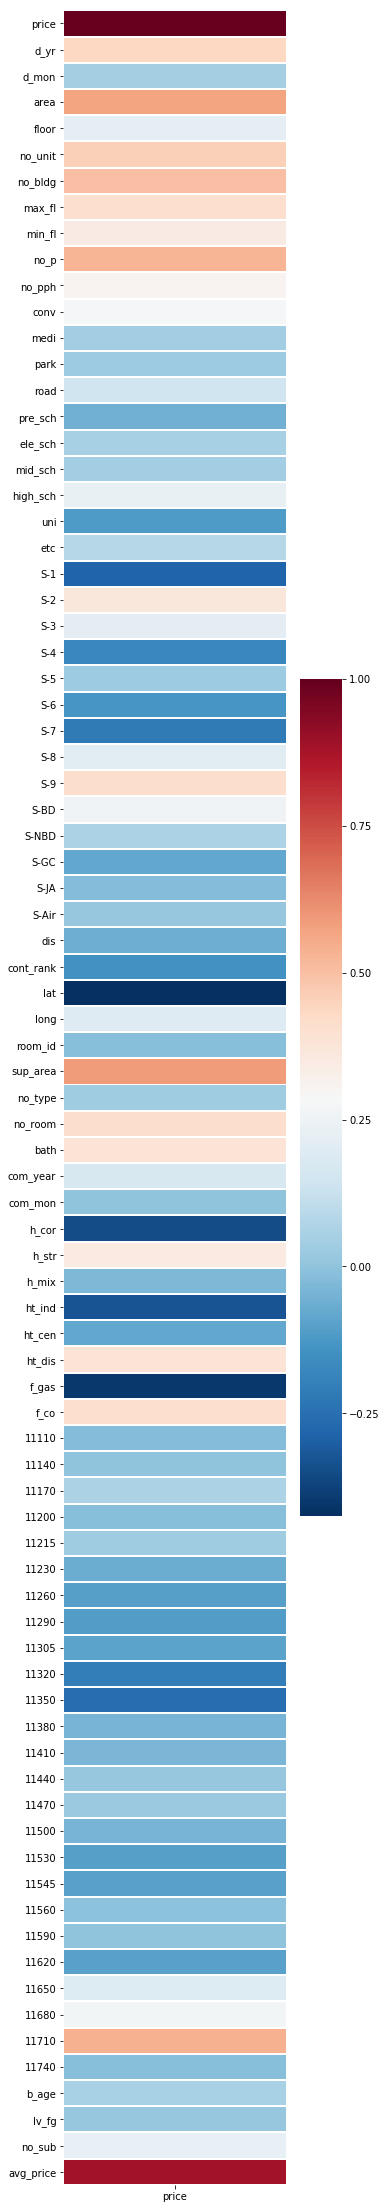

In [14]:
plt.figure(figsize=(5, 40))
sns.heatmap(data=tmp, annot=False, fmt='.2f', linewidths='1', cmap='RdBu_r')

In [15]:
gangnam_extract = dong_remove_df.loc[:][dong_remove_df['11680'] == 1]
gangnam_extract.head()

,price,d_yr,d_mon,area,floor,no_unit,no_bldg,max_fl,min_fl,no_p,...,11590,11620,11650,11680,11710,11740,b_age,lv_fg,no_sub,avg_price
528204,62000,2006,10,59.40,2,1050,12,22,12,1066,...,0,0,0,1,0,0,1,0.090909,2,1043.771044
528205,62000,2006,10,59.40,2,1050,12,22,12,1066,...,0,0,0,1,0,0,1,0.090909,2,1043.771044
528206,70000,2006,10,59.40,17,1050,12,22,12,1066,...,0,0,0,1,0,0,1,0.772727,2,1178.451178
528207,70000,2006,10,59.40,17,1050,12,22,12,1066,...,0,0,0,1,0,0,1,0.772727,2,1178.451178
528208,108000,2006,10,80.87,12,1050,12,22,12,1066,...,0,0,0,1,0,0,1,0.545455,2,1335.476691


In [16]:
gangnam_rmv_gu = gangnam_extract.drop(['11110', '11140', '11170', '11200',
       '11215', '11230', '11260', '11290', '11305', '11320', '11350',
       '11380', '11410', '11440', '11470', '11500', '11530', '11545',
       '11560', '11590', '11620', '11650', '11680', '11710', '11740'], 1)

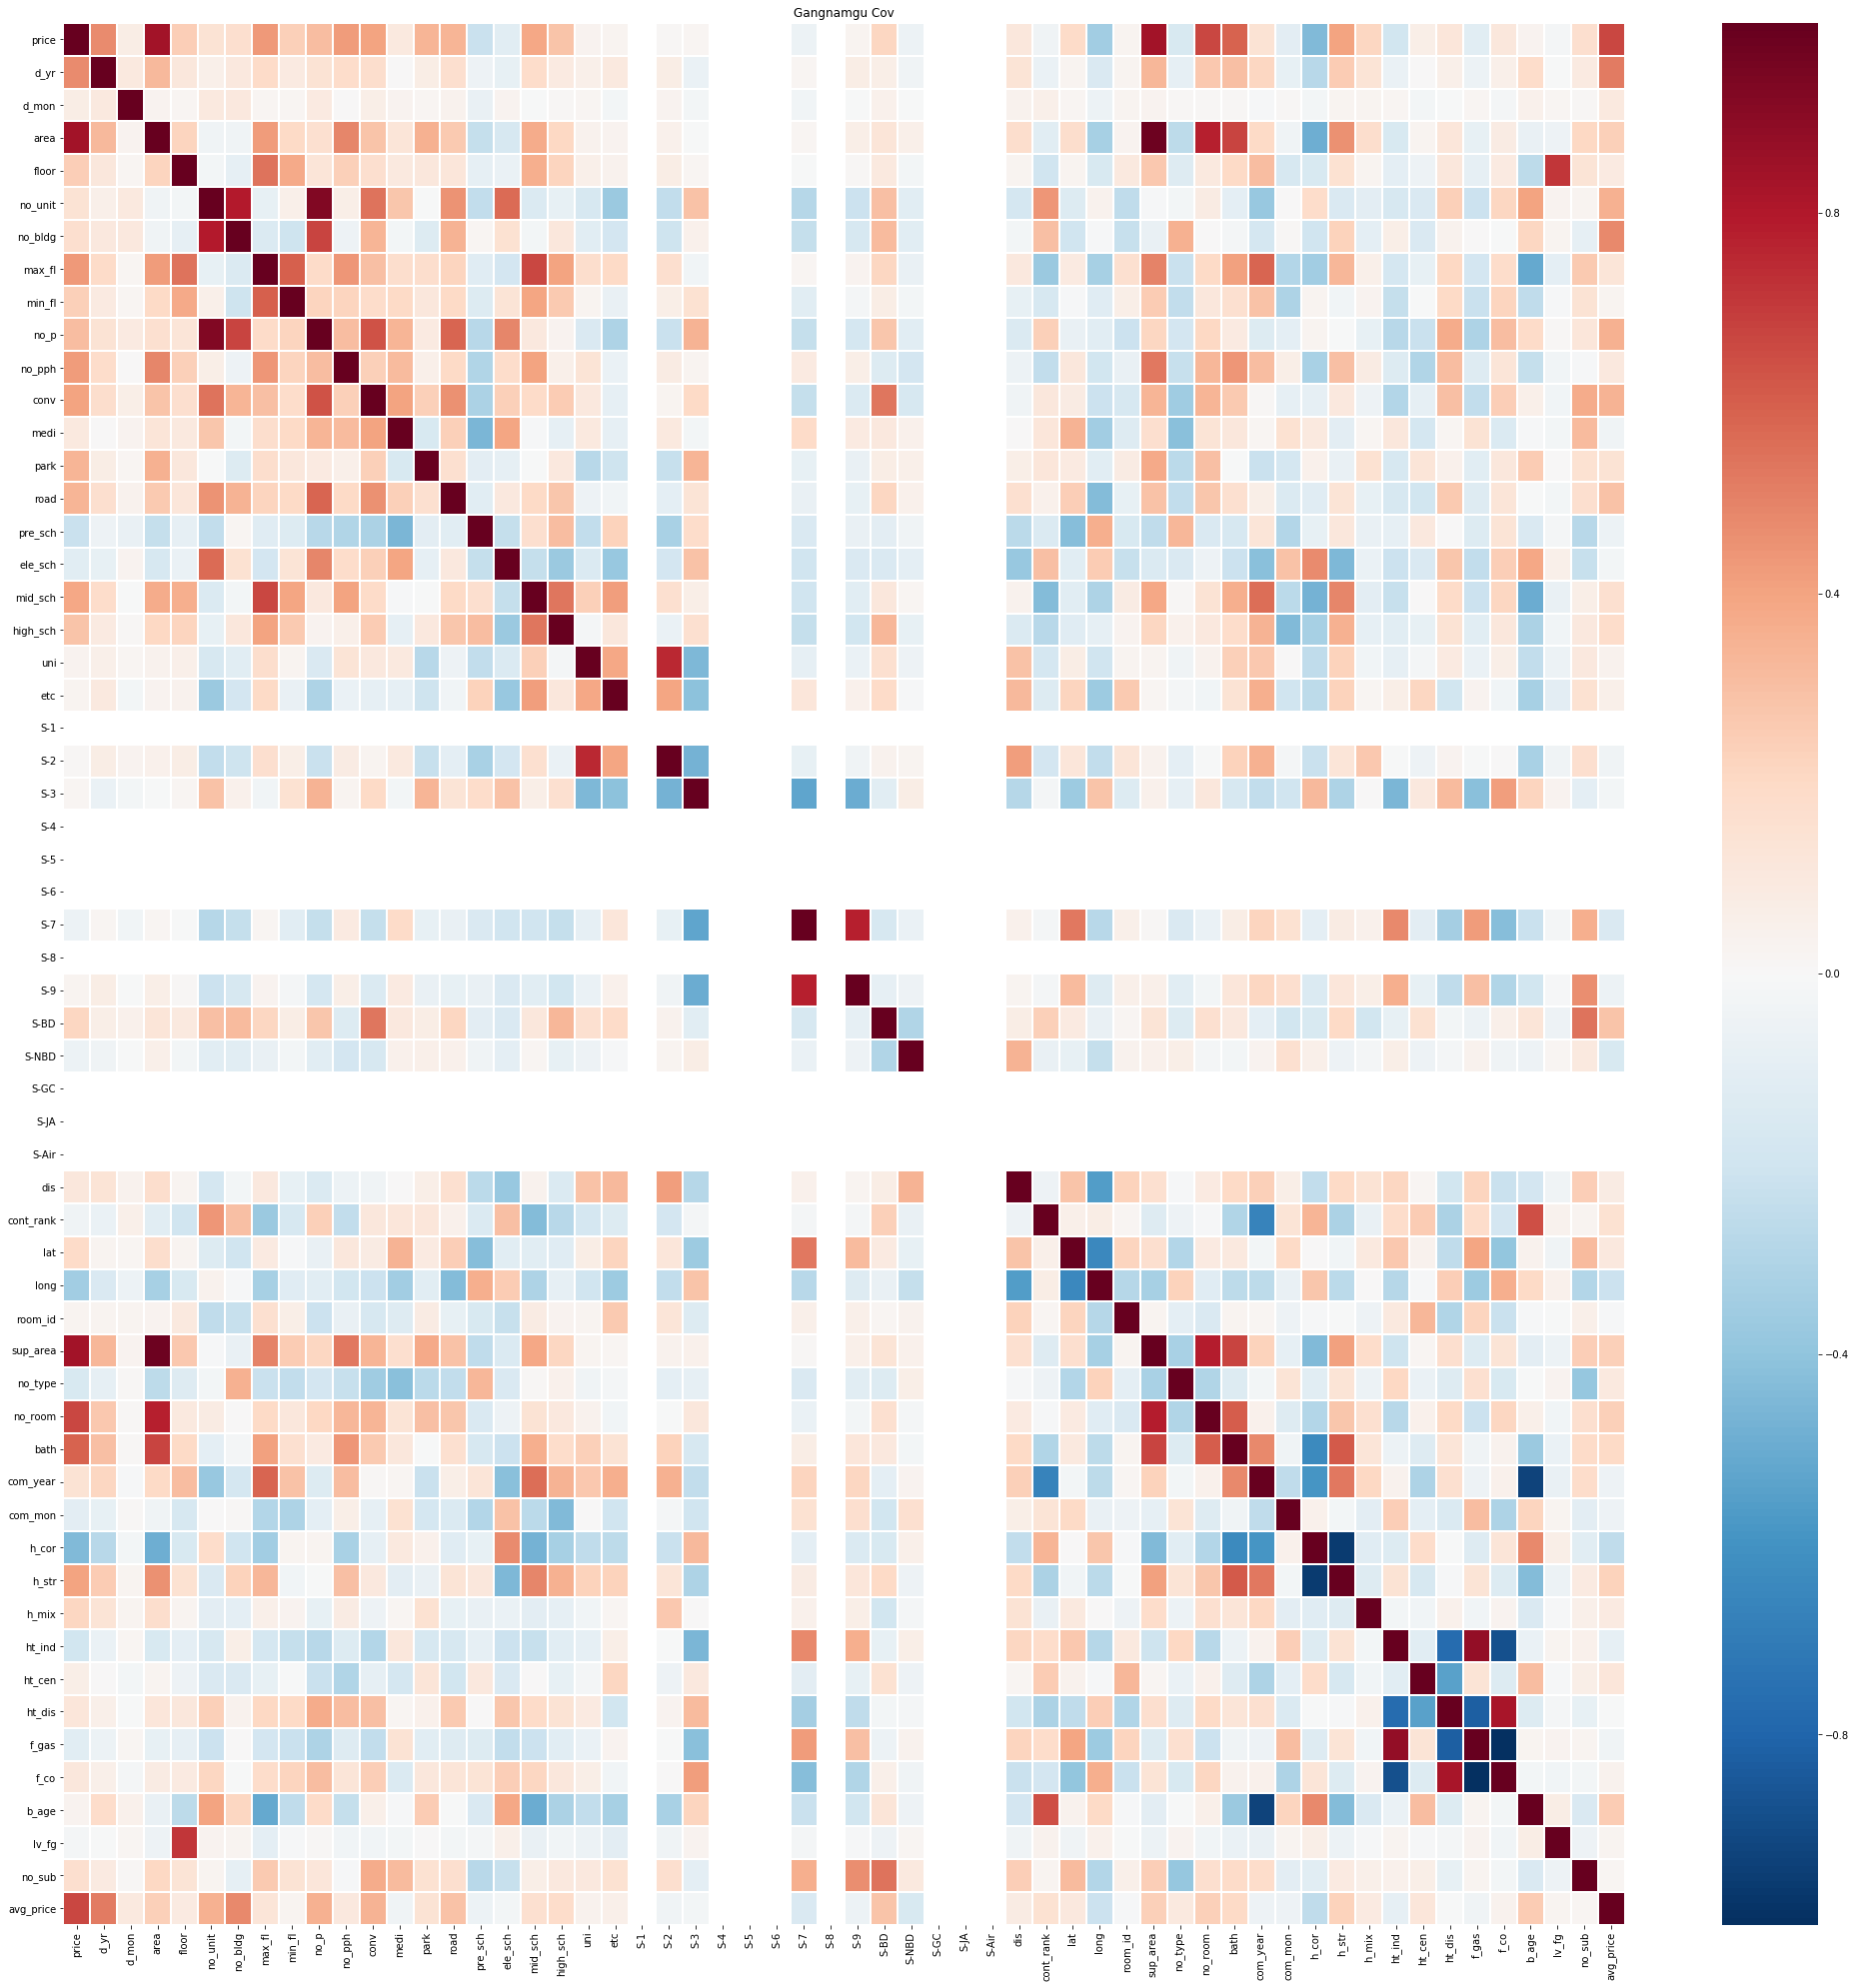

In [17]:
plt.figure(figsize=(35, 35))
plt.title('Gangnamgu Cov')
sns.heatmap(data=gangnam_rmv_gu.corr(method='pearson'), annot=False, fmt='.2f', linewidths='1', cmap='RdBu_r')

In [18]:
gwanak_extract = dong_remove_df.loc[:][dong_remove_df['11620'] == 1]
gwanak_extract.head()

,price,d_yr,d_mon,area,floor,no_unit,no_bldg,max_fl,min_fl,no_p,...,11590,11620,11650,11680,11710,11740,b_age,lv_fg,no_sub,avg_price
478035,39400,2006,10,84.96,12,1597,8,29,12,1803,...,0,1,0,0,0,0,6,0.413793,1,463.747646
478036,39400,2006,10,84.96,12,1597,8,29,12,1803,...,0,1,0,0,0,0,6,0.413793,1,463.747646
478037,39400,2006,10,84.96,12,1597,8,29,12,1803,...,0,1,0,0,0,0,6,0.413793,1,463.747646
478038,39400,2006,10,84.96,12,1597,8,29,12,1803,...,0,1,0,0,0,0,6,0.413793,1,463.747646
478039,39400,2006,10,84.96,12,1597,8,29,12,1803,...,0,1,0,0,0,0,6,0.413793,1,463.747646


In [19]:
gwanak_rmv_gu = gwanak_extract.drop(['11110', '11140', '11170', '11200',
       '11215', '11230', '11260', '11290', '11305', '11320', '11350',
       '11380', '11410', '11440', '11470', '11500', '11530', '11545',
       '11560', '11590', '11620', '11650', '11680', '11710', '11740'], 1)

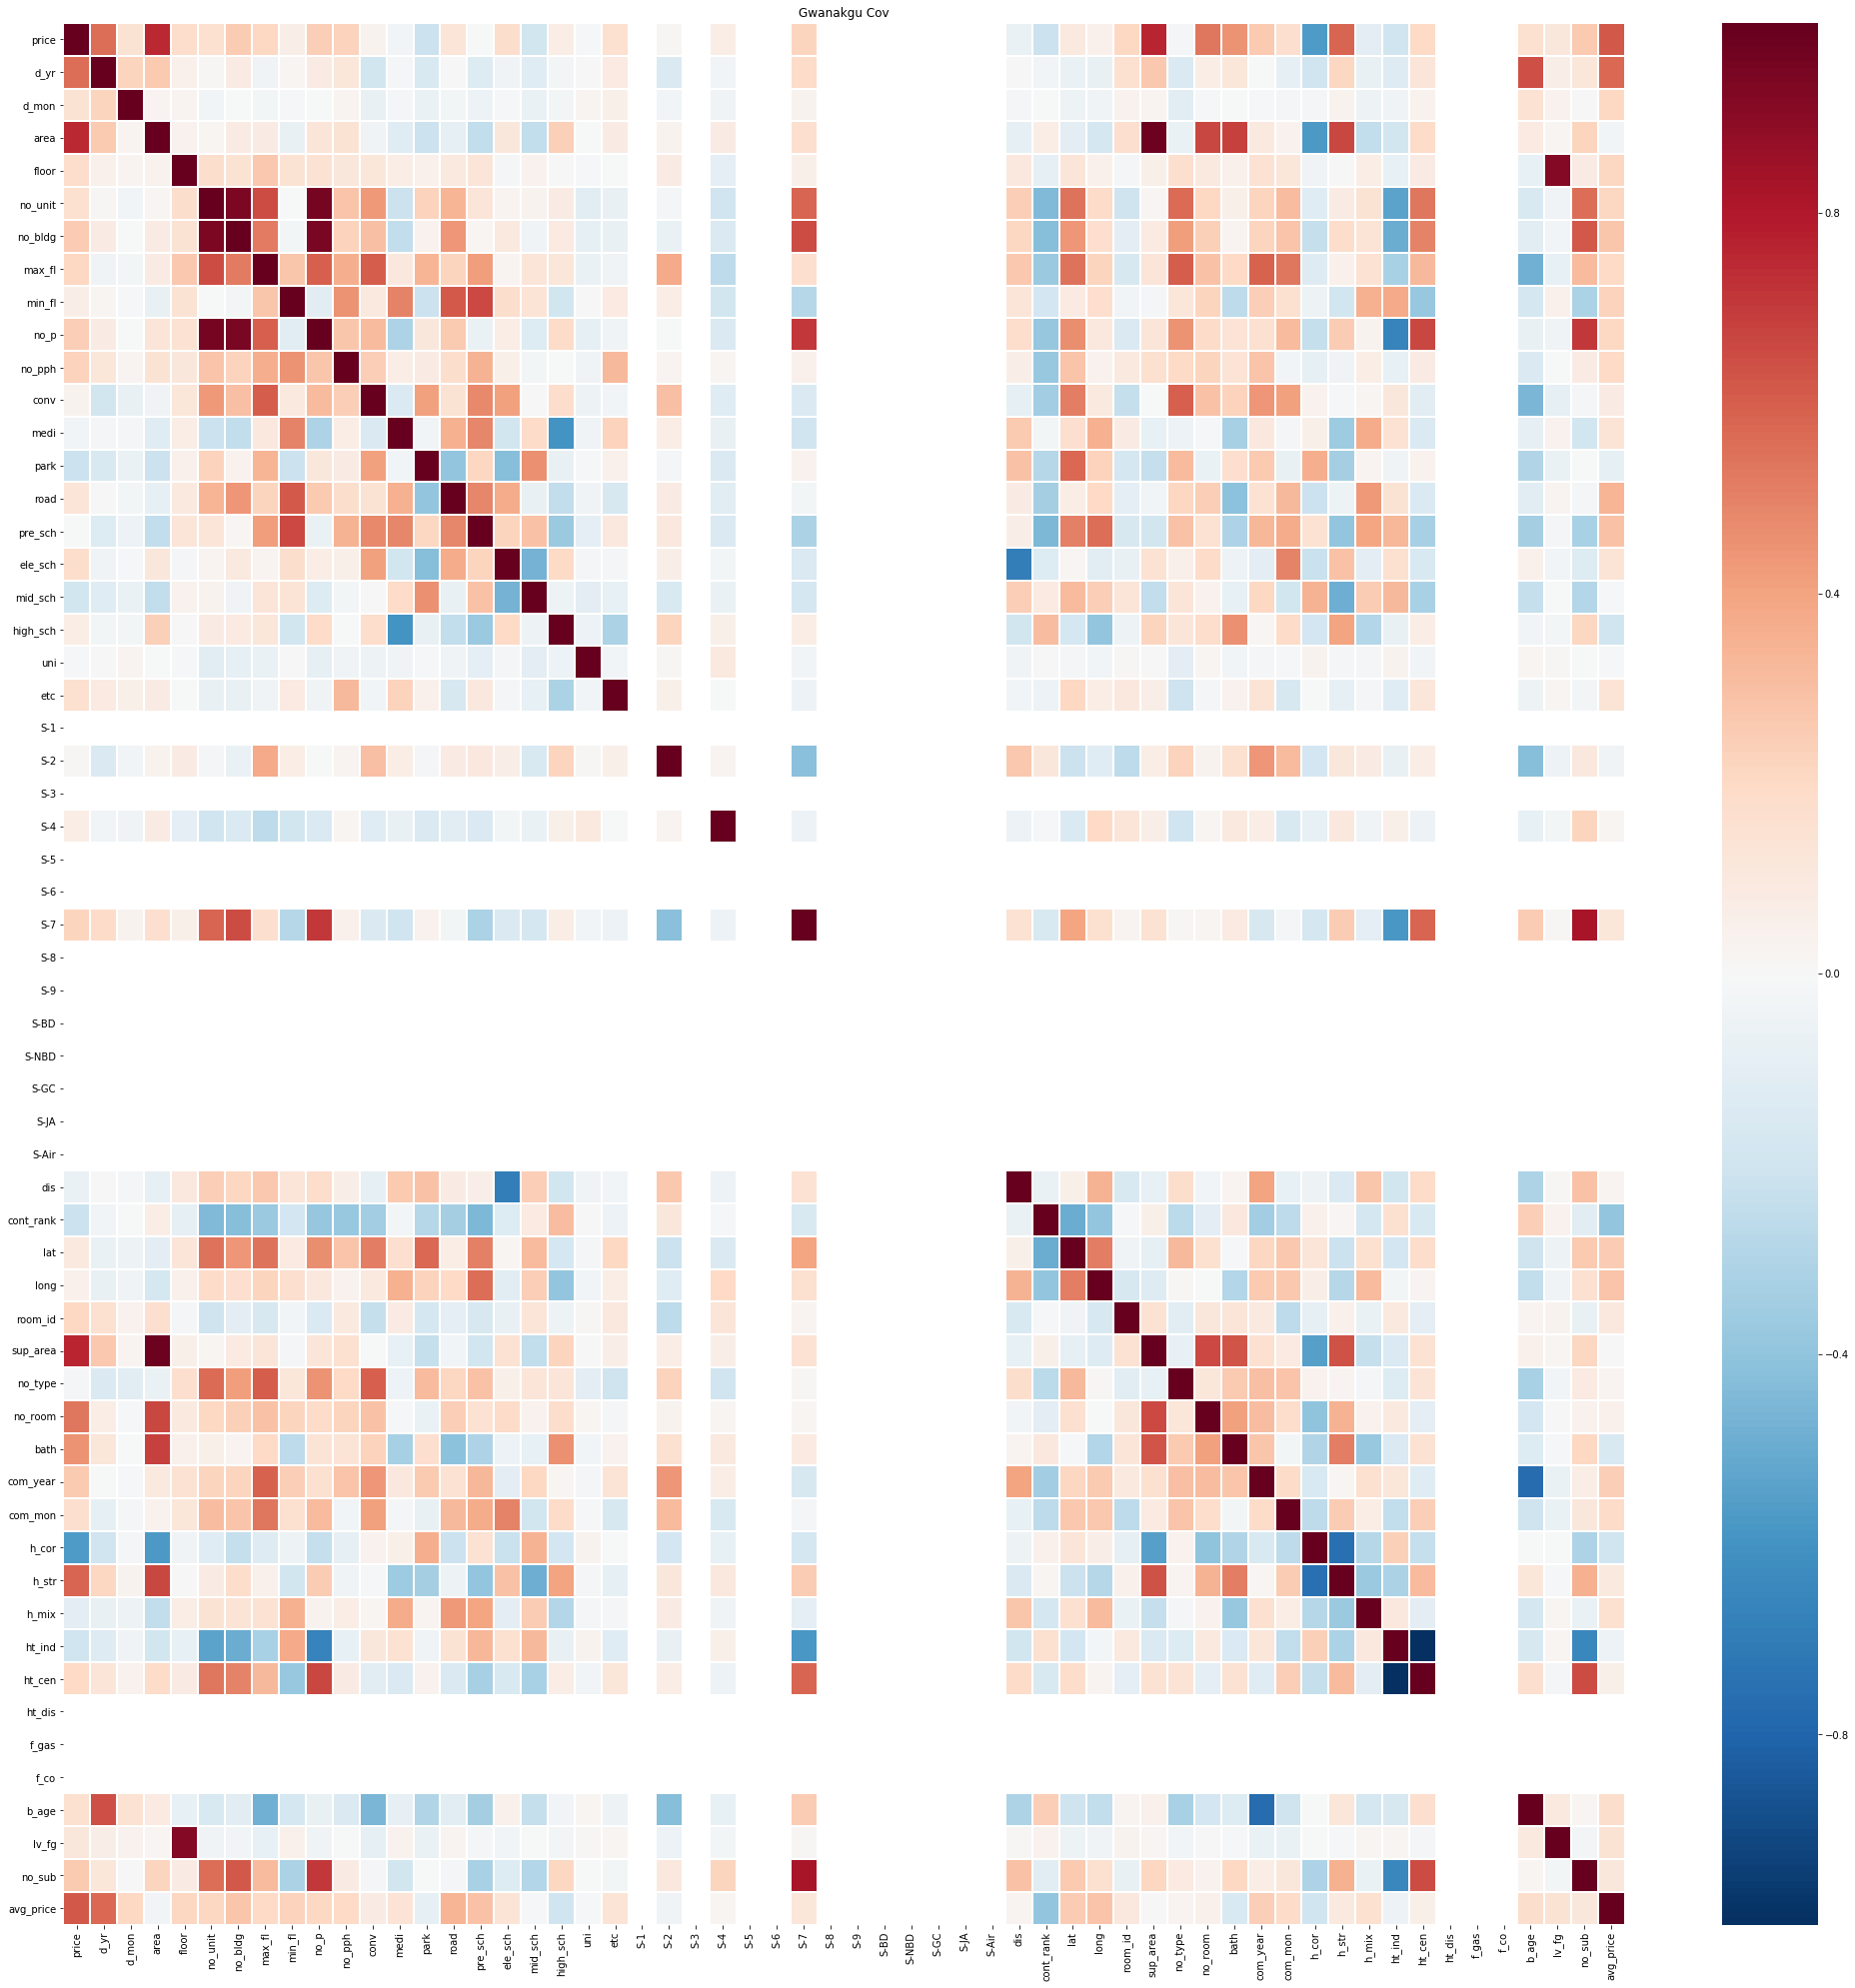

In [20]:
plt.figure(figsize=(35, 35))
plt.title('Gwanakgu Cov')
sns.heatmap(data=gwanak_rmv_gu.corr(method='pearson'), annot=False, fmt='.2f', linewidths='1', cmap='RdBu_r')

In [21]:
nowon_extract = dong_remove_df.loc[:][dong_remove_df['11350'] == 1]
nowon_extract.head()

,price,d_yr,d_mon,area,floor,no_unit,no_bldg,max_fl,min_fl,no_p,...,11590,11620,11650,11680,11710,11740,b_age,lv_fg,no_sub,avg_price
199674,21250,2006,11,81.8788,2,105,2,19,9,105,...,0,0,0,0,0,0,4,0.105263,3,259.529939
199675,21250,2006,11,81.8788,2,105,2,19,9,105,...,0,0,0,0,0,0,4,0.105263,3,259.529939
199676,21250,2006,11,81.8788,2,105,2,19,9,105,...,0,0,0,0,0,0,4,0.105263,3,259.529939
199677,21250,2006,11,81.8788,2,105,2,19,9,105,...,0,0,0,0,0,0,4,0.105263,3,259.529939
199678,22000,2006,11,81.8788,18,105,2,19,9,105,...,0,0,0,0,0,0,4,0.947368,3,268.689820


In [22]:
nowon_rmv_gu = nowon_extract.drop(['11110', '11140', '11170', '11200',
       '11215', '11230', '11260', '11290', '11305', '11320', '11350',
       '11380', '11410', '11440', '11470', '11500', '11530', '11545',
       '11560', '11590', '11620', '11650', '11680', '11710', '11740'], 1)

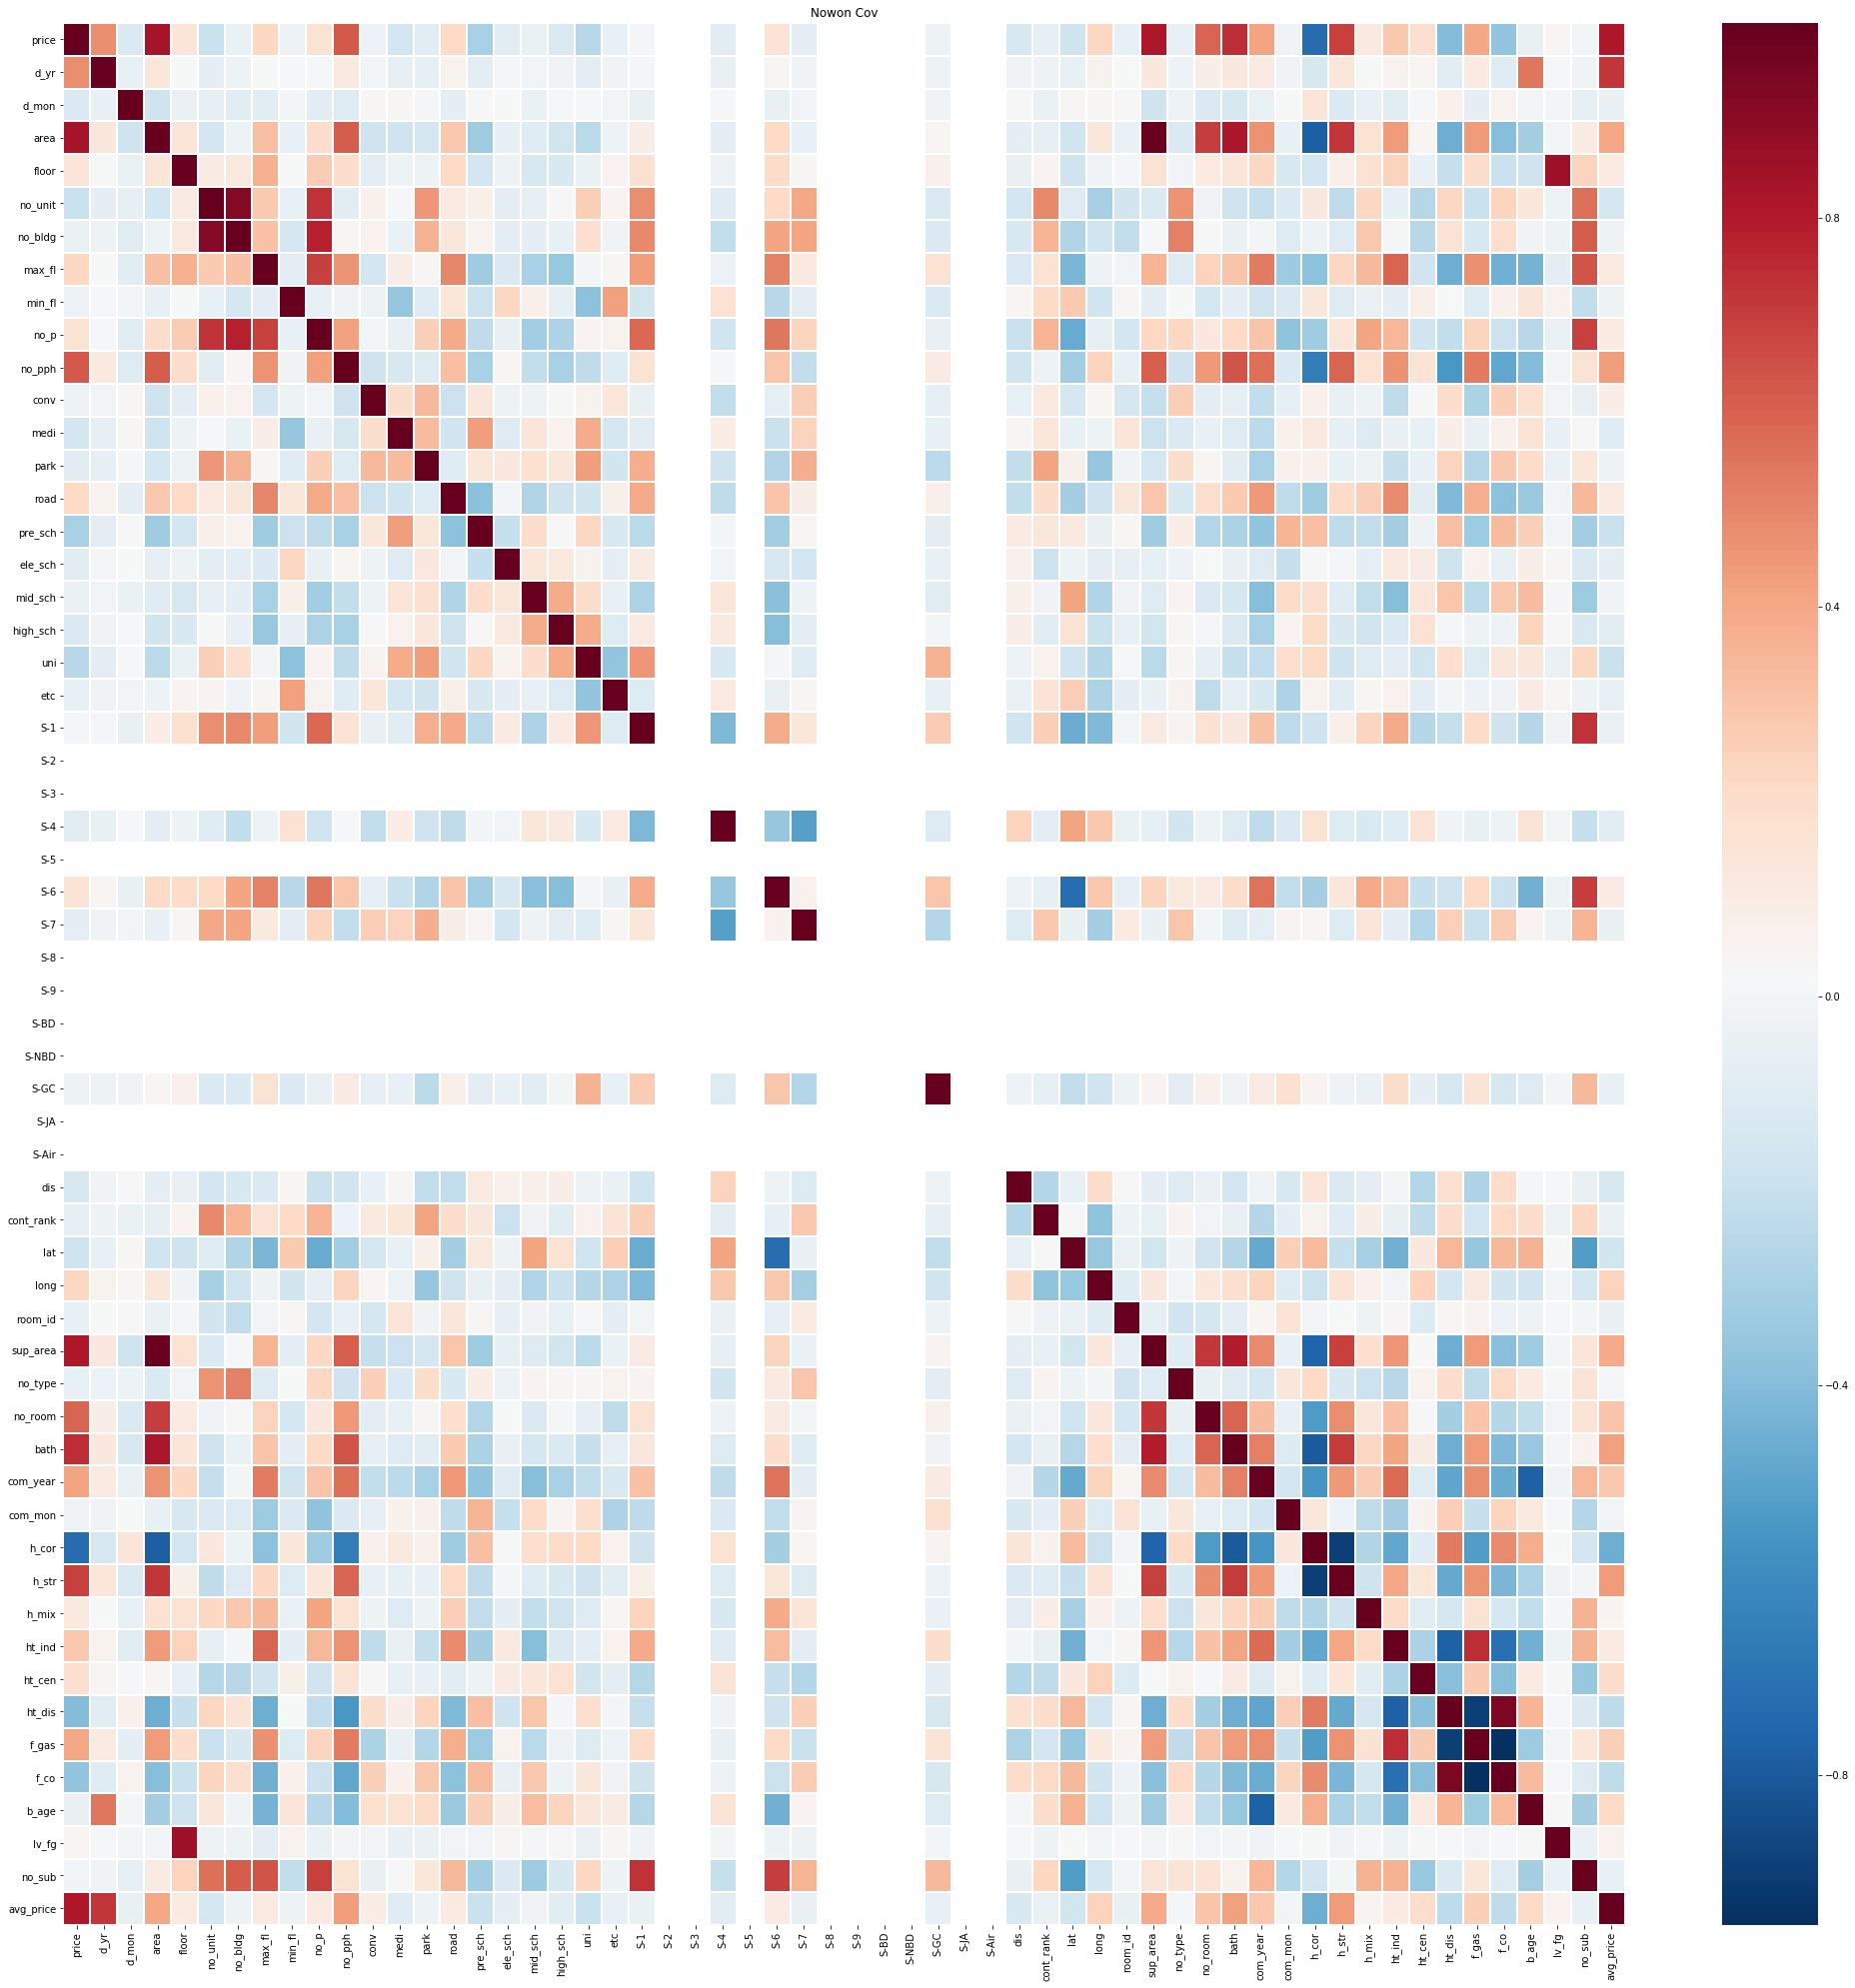

In [23]:
plt.figure(figsize=(35, 35))
plt.title('Nowon Cov')
sns.heatmap(data=nowon_rmv_gu.corr(method='pearson'), annot=False, fmt='.2f', linewidths='1', cmap='RdBu_r')

In [24]:
seodae_extract = dong_remove_df.loc[:][dong_remove_df['11410'] == 1]
seodae_extract.head()

,price,d_yr,d_mon,area,floor,no_unit,no_bldg,max_fl,min_fl,no_p,...,11590,11620,11650,11680,11710,11740,b_age,lv_fg,no_sub,avg_price
293871,19850,2006,10,59.86,2,237,3,17,12,294,...,0,0,0,0,0,0,4,0.117647,2,331.607083
293872,19850,2006,10,59.86,2,237,3,17,12,294,...,0,0,0,0,0,0,4,0.117647,2,331.607083
293873,19850,2006,10,59.86,2,237,3,17,12,294,...,0,0,0,0,0,0,4,0.117647,2,331.607083
293874,19850,2006,10,59.86,2,237,3,17,12,294,...,0,0,0,0,0,0,4,0.117647,2,331.607083
293875,19850,2006,10,59.86,2,237,3,17,12,294,...,0,0,0,0,0,0,4,0.117647,2,331.607083


In [25]:
seodae_rmv_gu = seodae_extract.drop(['11110', '11140', '11170', '11200',
       '11215', '11230', '11260', '11290', '11305', '11320', '11350',
       '11380', '11410', '11440', '11470', '11500', '11530', '11545',
       '11560', '11590', '11620', '11650', '11680', '11710', '11740'], 1)

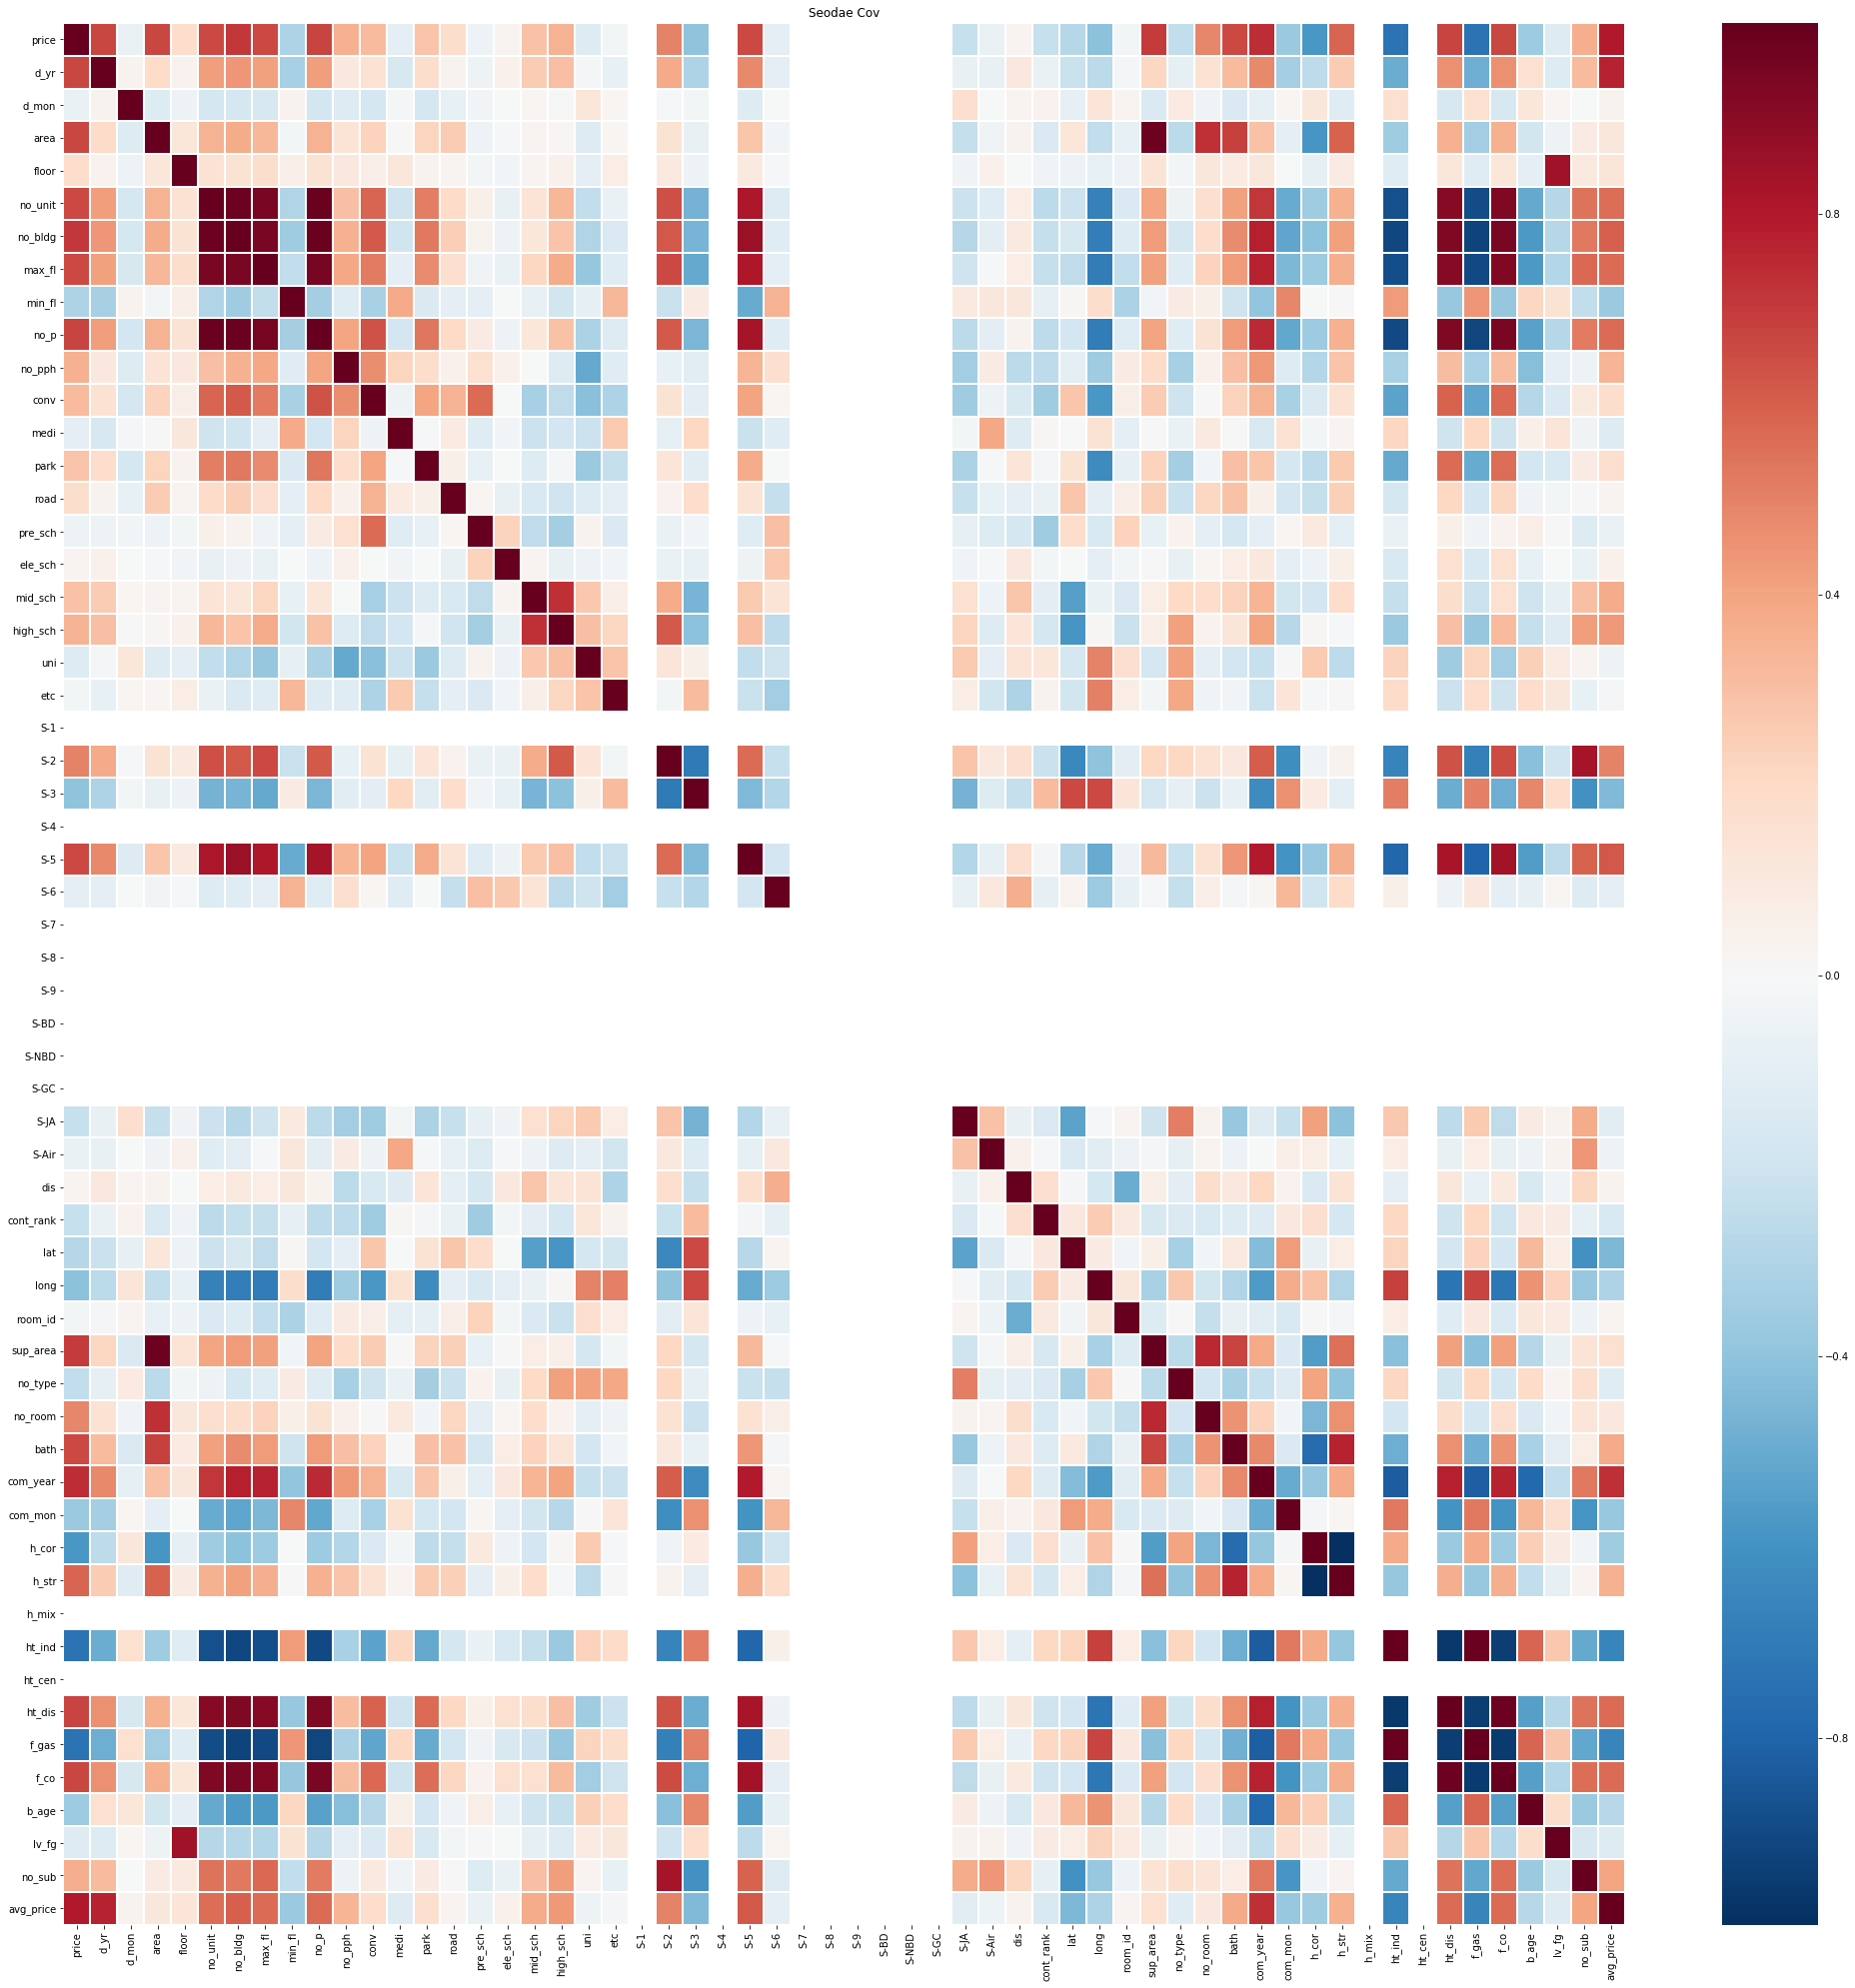

In [26]:
plt.figure(figsize=(35, 35))
plt.title('Seodae Cov')
sns.heatmap(data=seodae_rmv_gu.corr(method='pearson'), annot=False, fmt='.2f', linewidths='1', cmap='RdBu_r')

### Decision Tree

In [27]:
from sklearn.model_selection import ShuffleSplit

In [28]:
data = data.drop(['51', '60', '69', '25', '22',
       '37', '8', '23', '3', '6', '16', '17', '10', '7', '11', '4', '12',
       '2', '1', '5', '9', '13', '14', '19', '18', '20', '15', '26', '21',
       '43', '45', '53', '24'], 1)

In [29]:
prices = data['price']
features = data.drop('price', axis = 1)

print('Housing dataset has {0} data points with {1} variables each'.format(*data.shape))

Housing dataset has 719231 data points with 83 variables each


In [35]:
minimum_price = np.min(prices)
minimum_price

4918

In [36]:
maximum_price = np.max(prices)
maximum_price

563000

In [37]:
mean_price = np.mean(prices)
mean_price

47843.27113403065

In [33]:
median_price = np.median(prices)
median_price

37916.0

In [34]:
std_price = np.std(prices)
std_price

33013.8576904311

In [33]:
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

In [34]:
print("First quartile of prices: {:,.2f}".format(first_quartile))
print("Second quartile of prices: {:,.2f}".format(third_quartile))
print("Interquartile (IQR) of prices: {:,.2f}".format(inter_quartile))

First quartile of prices: 25,400.00
Second quartile of prices: 60,000.00
Interquartile (IQR) of prices: 34,600.00


In [ ]:
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(82, 82, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [35]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

In [36]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [41]:
print(features.shape[0])
print(float(X_train.shape[0]) / float(features.shape[0]))
print(float(X_test.shape[0]) / float(features.shape[0]))

719231
0.7999988877008917
0.20000111229910836


In [2]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [56]:
# Import RandomizedSearchCV

# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

In [3]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))


NameError: name 'X_train' is not defined